# Sensors

In [1]:
from matplotlib import pyplot as plt
from jwave.utils import show_field, show_positive_field

## Initial setup

In [2]:
from jwave.geometry import *

domain = Domain((128, 128), (0.1e-3, 0.1e-3))


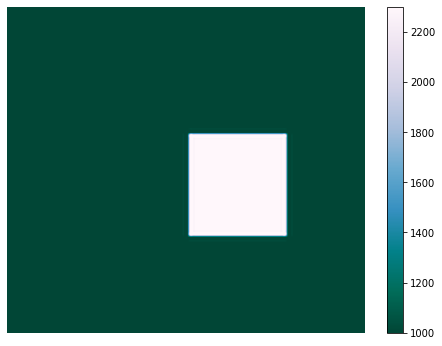

In [3]:
import numpy as np
from jaxdf import FourierSeries

density = np.ones(domain.N)*1000
density[50:90,65:100] = 2300
density = FourierSeries(np.expand_dims(density,-1), domain)

show_positive_field(density)

In [4]:
medium = Medium(domain=domain, sound_speed=1500., density=density)
time_axis = TimeAxis.from_medium(medium, cfl=0.3)

In [5]:
# Defining the initial pressure
from jwave.geometry import _circ_mask
from jwave import FourierSeries
from jax import numpy as jnp

N = domain.N
p0 =  _circ_mask(N, 3, (64,30))

p0 = 1.0*jnp.expand_dims(p0, -1)
p0 = FourierSeries(p0, domain)

Text(0.5, 1.0, 'Initial pressure')

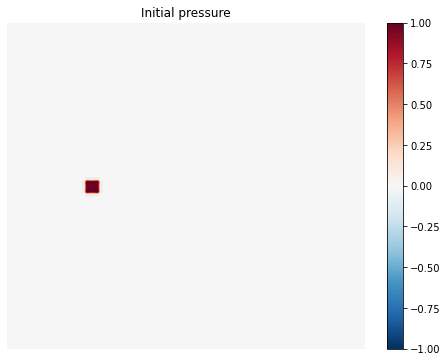

In [6]:
show_field(p0)
plt.title("Initial pressure")

In [7]:
from jwave.acoustics import simulate_wave_propagation
from jax import jit

@jit
def compiled_simulator(c, p0):
    medium = Medium(domain=domain, sound_speed=1500., density=c)
    return simulate_wave_propagation(medium, time_axis, p0=p0)

In [8]:
pressure = compiled_simulator(density, p0)

Text(0.5, 1.0, 'Pressure field at t=5.4000001910026185e-06')

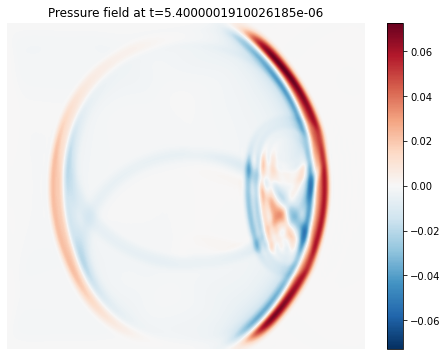

In [9]:
t = 270
show_field(pressure[t])
plt.title(f"Pressure field at t={time_axis.to_array()[t]}")

In [10]:
pressure = compiled_simulator(1000., p0) # Works with different input types

Text(0.5, 1.0, 'Pressure field at t=4.999999873689376e-06')

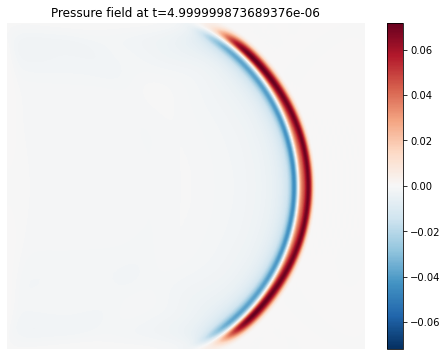

In [11]:
t = 250
show_field(pressure[t])
plt.title(f"Pressure field at t={time_axis.to_array()[t]}")